In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['species'],cateories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
 df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

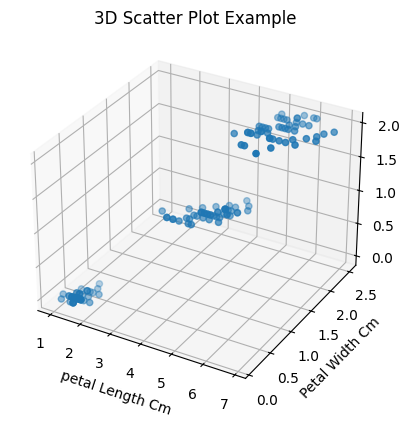

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('petal Length Cm')
ax.set_ylabel('Petal Width Cm')
plt.title('3D Scatter Plot Example')
plt.show()

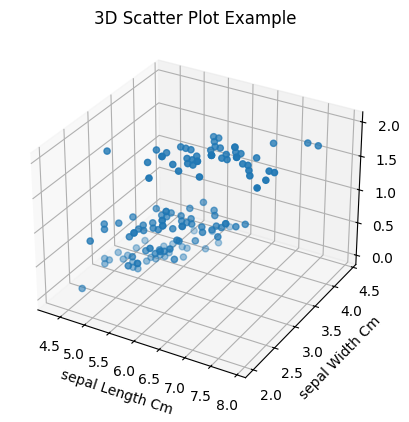

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('sepal Length Cm')
ax.set_ylabel('sepal Width Cm')
plt.title('3D Scatter Plot Example')
plt.show()

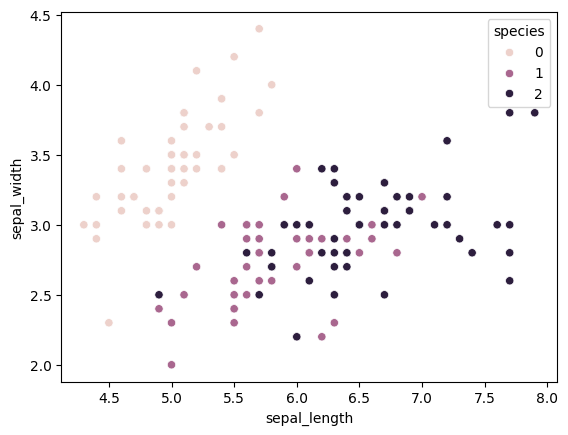

In [12]:
sns.scatterplot(data=df, x='sepal_length',y='sepal_width' , hue='species');

<Axes: xlabel='petal_length', ylabel='petal_width'>

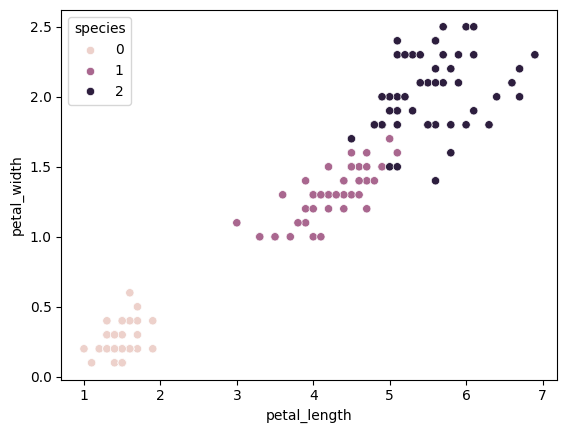

In [14]:

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [17]:


sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_length', 'petal_width']])
    sse.append(km.inertia_)

print(sse)

[550.6434666666668, 86.40394533571002, 31.387758974358984, 19.499400899685114, 13.93330875790876, 11.414710144927538, 9.228504827285606, 8.431689355635466, 6.557984461432289]


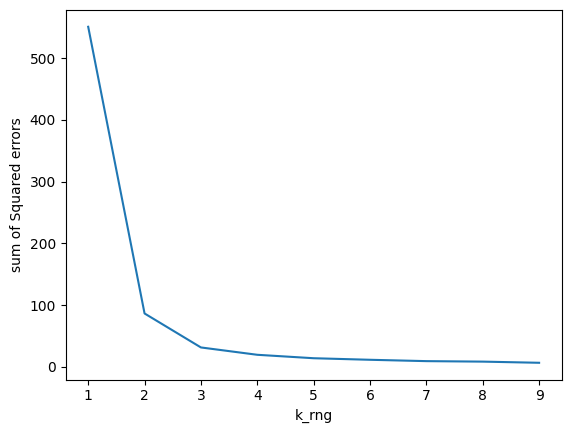

In [18]:
plt.xlabel('k_rng')
plt.ylabel("sum of Squared errors")
plt.plot(k_rng,sse)

In [20]:
km = KMeans(n_clusters=3, random_state=0)
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
print(y_predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.species,df.cluster)
print(cm)

[[ 0 50  0]
 [48  0  2]
 [ 4  0 46]]


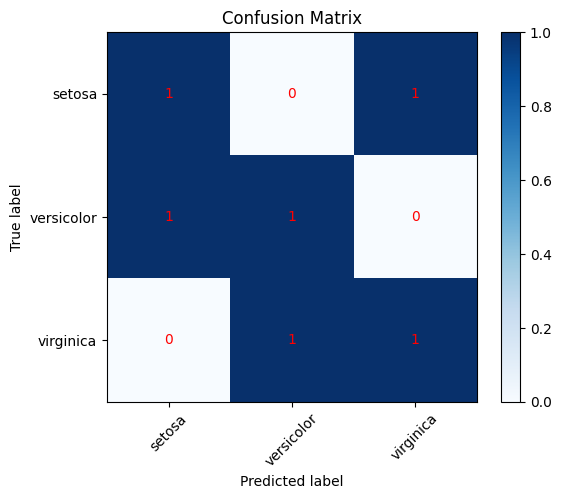

In [34]:
true_labels = ['setosa', 'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica']
predicted_labels = ['setosa', 'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor']

cm = confusion_matrix(true_labels, predicted_labels)
class_labels = ['setosa', 'versicolor', 'virginica']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')


for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()